# Heart Disease Prediction using Logistic Regression.

In [149]:
#importing necessay libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

%matplotlib inline

## Importing Data

In [150]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Analysis

In [151]:
#checking number of rows and columns
data.shape

(303, 14)

In [152]:
#checking missing values & data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**As we can see, the dataset is not having any missing values.**

In [153]:
#statistical analysis of numerical variables
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [154]:
#checking for null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**None of the columns are having null values & we are good to proceed without much cleaning.**

## Exploratory Data Analysis

### Checking Imbalance in Target variable

In [155]:
data.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

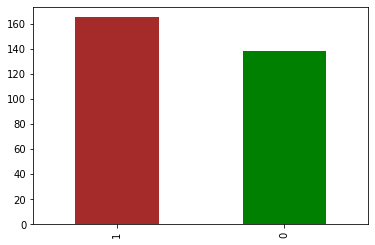

In [156]:
data.target.value_counts().plot(kind='bar', color=['brown', 'green'])
plt.show()

**Both the labels in the target variable seems to be having very close proportion. Hence, we can move forward with this.**

**For easy analysis, we can separate the entire columns into continuous and discrete columns based on a threshold.**

In [157]:
continuous_cols = []
discrete_cols = []

for cols in data.columns : 
    if len(data[cols].unique()) < 10 : 
        discrete_cols.append(cols)
    else:
        continuous_cols.append(cols)

print('continuous_cols = ', continuous_cols)
print('discrete_cols = ', discrete_cols)

continuous_cols =  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
discrete_cols =  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


**We have assigned a threshold value of 10, meaning if a column has more than 10 unique values then it is a continuous column and discrete otherwise.**

**This is just done for the purpose of easily visualizing the variables.**

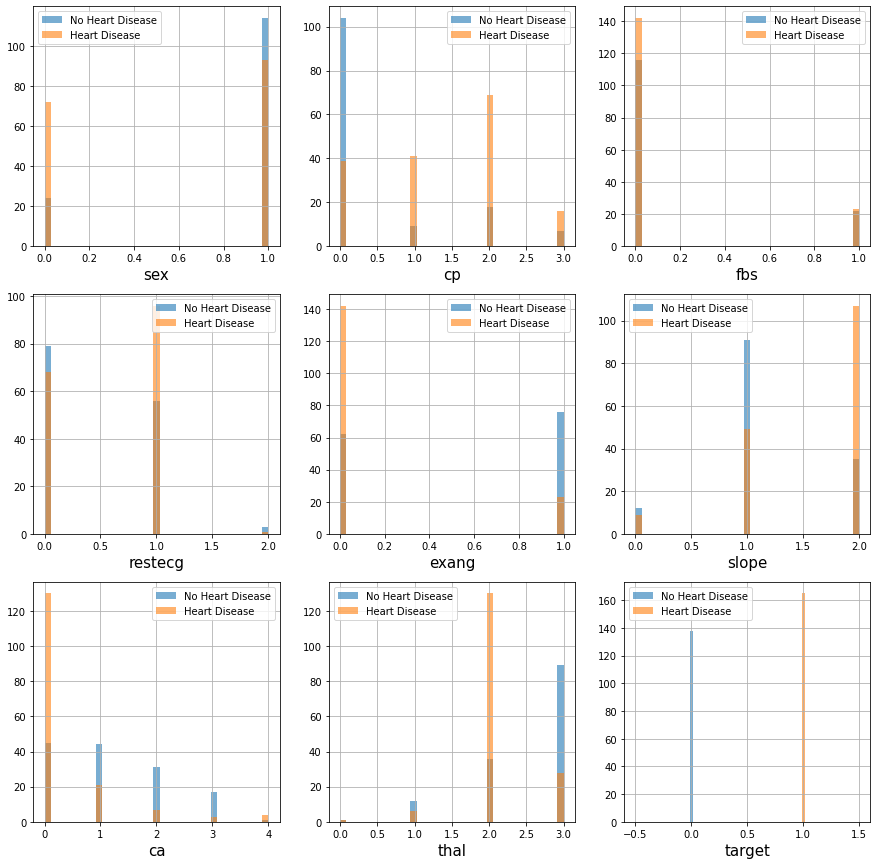

In [158]:
plt.figure(figsize=[15,15])

for index, cols in enumerate(discrete_cols):
    plt.subplot(3,3,index+1)
    data[data.target == 0][cols].hist(bins=35, label = 'No Heart Disease', alpha=0.6)
    data[data.target == 1][cols].hist(bins=35, label = 'Heart Disease', alpha=0.6)
    
    plt.legend()
    plt.xlabel(cols, fontsize = 15)


**Chest Pain (cp) : People with chest pain 1,2 & 3 are more likely to get a heart disease than with a cp of 0.**

**Rest ECG (restecg) : Electrocardiogram results taken at rest. People with a value of 1 which shows abnormal activity in heart results in heart disease.**

**Exercise induced Angina (exang) : People with a value 0 (angina not induced by exercise) develops heart disease.**

**Thalium (thal) : Thalium value of 2 shows presence of heart disease. It is some defect that happened in the past and corrected over time.**

**Fluoroscopy performed (ca) : It shows the number of vessels stained by fluoroscopy. More the number means more movement of blood and better is the condition.**

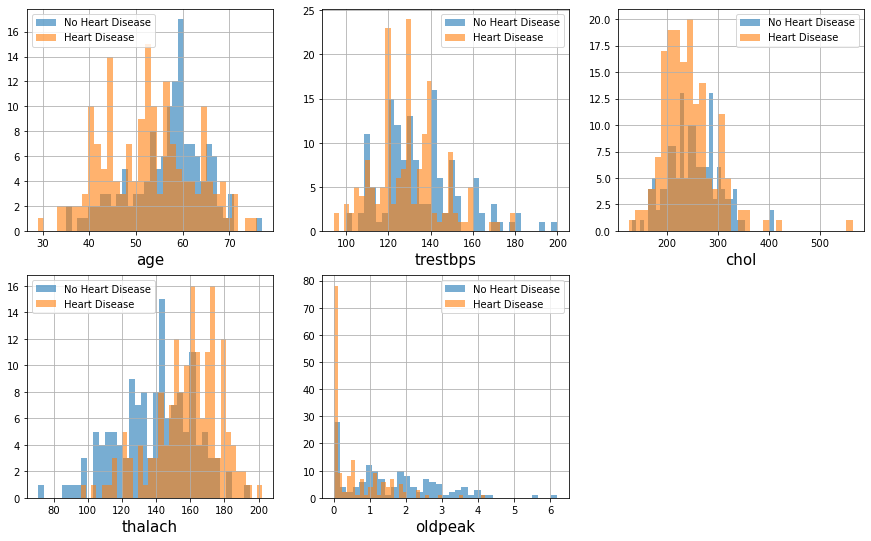

In [159]:
plt.figure(figsize=[15,9])

for index, cols in enumerate(continuous_cols):
    plt.subplot(2,3,index+1)
    data[data.target == 0][cols].hist(bins=35, label = 'No Heart Disease', alpha=0.6)
    data[data.target == 1][cols].hist(bins=35, label = 'Heart Disease', alpha=0.6)
    
    plt.legend()
    plt.xlabel(cols, fontsize = 15)


**Blood Pressure at Rest (trestbps) : Anything above 120 is very dangerous.**

**Cholestrol (chol) : Cholestrol above 180 is not good for health and can cause heart ailments.**

**Maximum heart rate acheived (thalach) : above 140 is very critical in causing heart disease.**

## Correlations

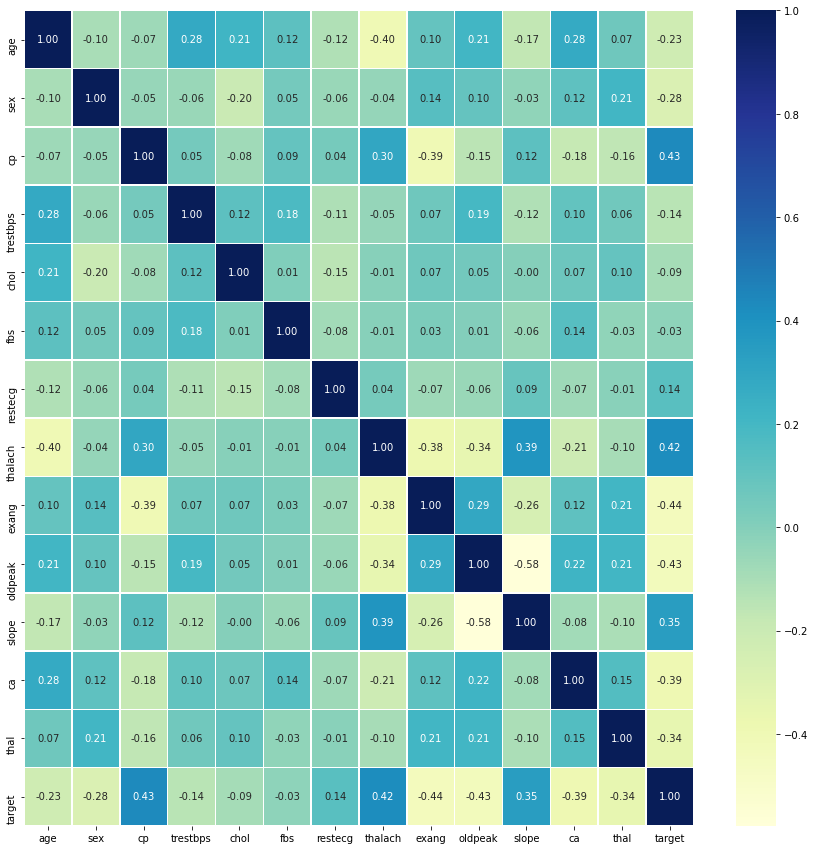

In [160]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr() ,annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");

**fbs & chol have very low relation with the target variable & all others posess good correlations.**

## Dummy Creation

In [161]:
discrete_cols

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [162]:
#we will remove the target variable and perform dummification

discrete_cols.remove('target')

new_data = pd.get_dummies(data, columns= discrete_cols,drop_first=True)

new_data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


**We will now separate the data into independent and target variables.**

In [163]:
X = new_data.drop('target',axis=1)
y = new_data.target

## Model Building

In [164]:
#splitting dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((212, 22), (91, 22), (212,), (91,))

### Scaling

**We will scale down the continuous attributes using StandardScaler.**

In [165]:
continuous_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [166]:
scaler = StandardScaler()

#scaling training set
X_train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(X_train[['age', 'trestbps', 
                                                                                           'chol', 'thalach', 'oldpeak']])

X_train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].head()

<ipython-input-166-228c90a07d5e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(X_train[['age', 'trestbps',
C:\Users\gauth\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,age,trestbps,chol,thalach,oldpeak
124,-1.673396,-2.147870,-0.886805,1.271190,-0.931190
72,-2.763624,-0.027779,-0.795025,2.284485,-0.931190
15,-0.474146,-0.616693,-0.519684,0.346008,0.537925
10,-0.038055,0.561135,-0.152563,0.434121,0.170646
163,-1.782419,0.443352,-1.327350,1.006853,-0.931190


In [167]:
#scaling test set

X_test[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.transform(X_test[['age', 'trestbps', 
                                                                                           'chol', 'thalach', 'oldpeak']])

X_test[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].head()

<ipython-input-167-0d3a63e359c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.transform(X_test[['age', 'trestbps',
C:\Users\gauth\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,age,trestbps,chol,thalach,oldpeak
179,0.289013,1.150049,0.526611,-1.680581,-0.380272
228,0.507059,2.327878,0.746884,0.390064,-0.747550
111,0.289013,1.150049,-2.226797,1.006853,-0.747550
246,0.179990,0.207787,2.967966,-0.006442,0.813383
60,1.815332,-1.205607,0.324694,-0.887568,-0.931190


### Logistic Model

In [168]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression()

#### Evaluating on Train set

In [169]:
#making predictions
y_train_pred = logreg.predict(X_train)

In [170]:
#checking accuracy
accuracy_score(y_train, y_train_pred)

0.8679245283018868

In [171]:
#confusion matrix

confusion_matrix(y_train, y_train_pred)

array([[ 80,  17],
       [ 11, 104]], dtype=int64)

In [172]:
#classification report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        97
           1       0.86      0.90      0.88       115

    accuracy                           0.87       212
   macro avg       0.87      0.86      0.87       212
weighted avg       0.87      0.87      0.87       212



#### Evaluating on the Test set

In [173]:
y_test_pred = logreg.predict(X_test)

#checking accuracy
accuracy_score(y_test, y_test_pred)

0.8681318681318682

In [174]:
#classification report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



**We have obtained very good accuracy scores on train and test sets.**

In [177]:
result = pd.DataFrame(data=[["Logistic Regression", accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)]], 
                          columns=['Model', 'Training Accuracy', 'Testing Accuracy'])
print(result)

                 Model  Training Accuracy  Testing Accuracy
0  Logistic Regression           0.867925          0.868132


##                                      Thank you